In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ay=pd.read_csv("/content/drive/MyDrive/netflix_movies (1).csv")

In [4]:
ay.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
ay.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
ay.director

,director
0,Kirsten Johnson
1,NaN
2,Julien Leclercq
3,NaN
4,NaN
...,...
8802,David Fincher
8803,NaN
8804,Ruben Fleischer
8805,Peter Hewitt


In [7]:
#replace null values with mode
ay.director.fillna(ay.director.mode()[0],inplace=True)
ay.cast.fillna(ay.cast.mode()[0],inplace=True)
ay.country.fillna(ay.country.mode()[0],inplace=True)
ay.date_added.fillna(ay.date_added.mode()[0],inplace=True)
ay.rating.fillna(ay.rating.mode()[0],inplace=True)
ay.duration.fillna(ay.duration.mode()[0],inplace=True)

<ipython-input-7-8d0f8f24b58d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ay.cast.fillna(ay.cast.mode()[0],inplace=True)
<ipython-input-7-8d0f8f24b58d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [8]:
ay.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
ay.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [10]:
ay.duplicated().sum()

0

In [11]:
#Q Find out which types of genre has most movies and TV Shows

most_common_genre = ay['listed_in'].str.split(', ').explode().mode()[0]

print(f"The most common genre is: {most_common_genre}")

The most common genre is: International Movies


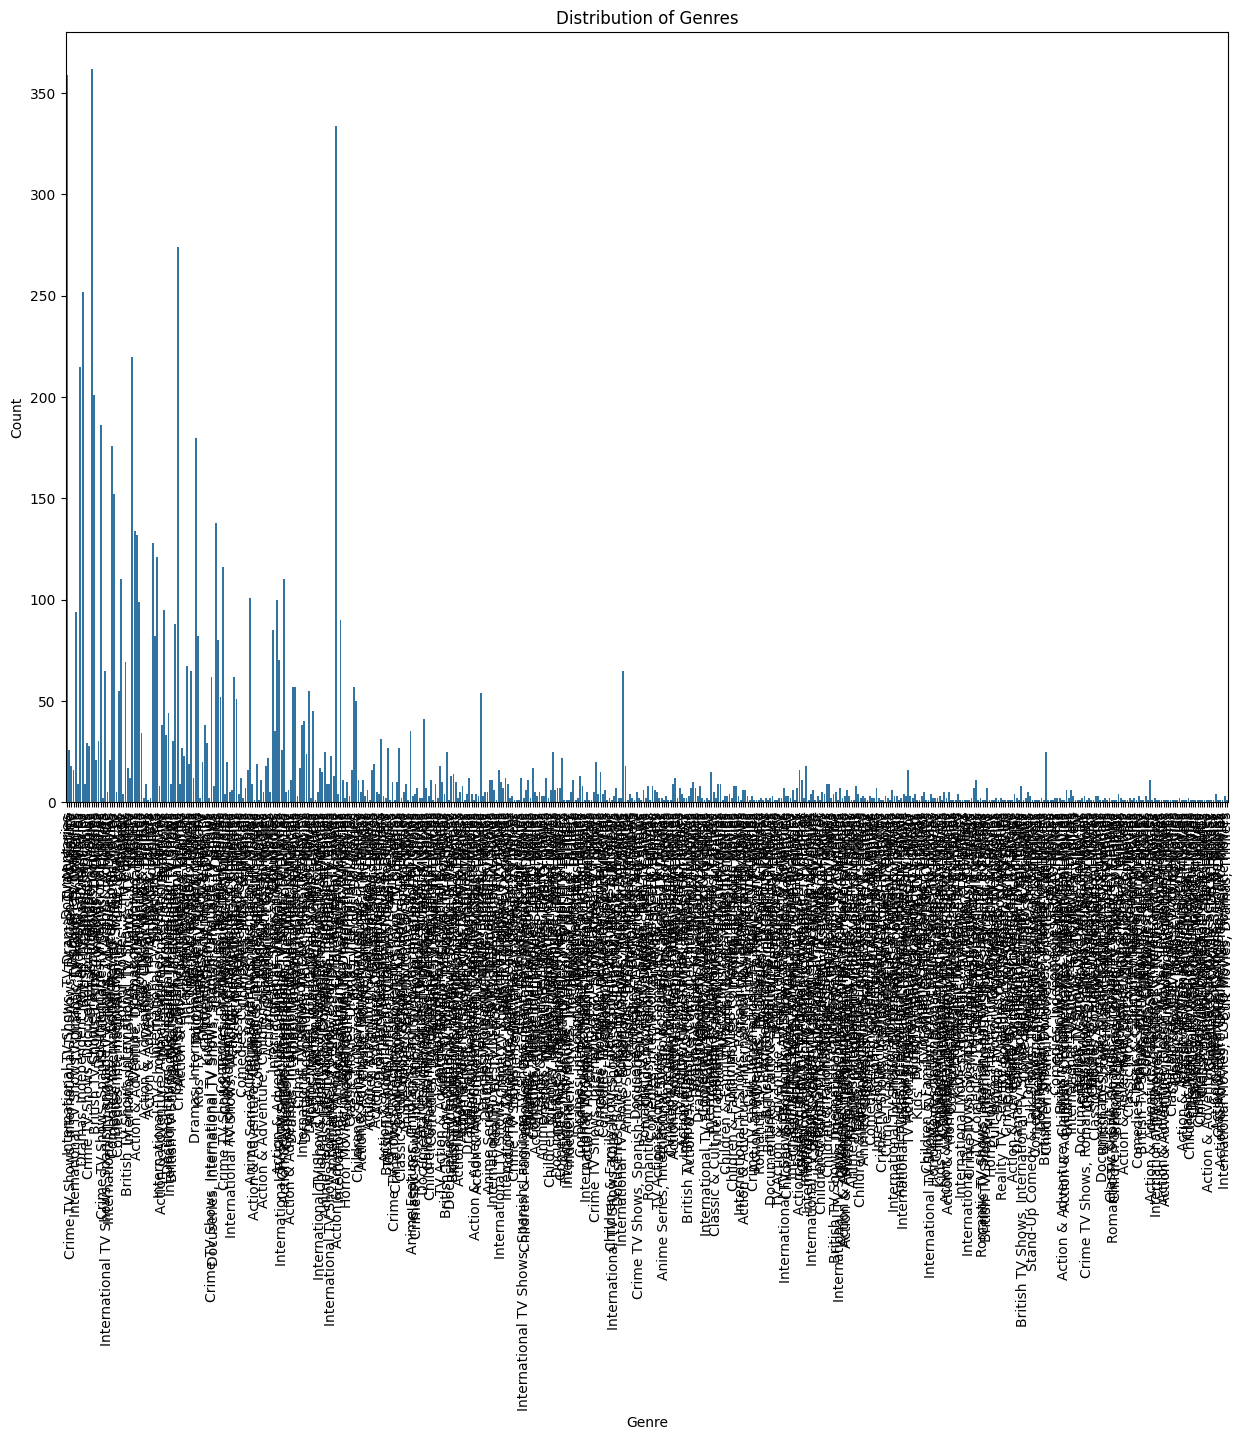

In [30]:
#visualization
plt.figure(figsize=(15, 10))
sns.countplot(data=ay, x='listed_in')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.show()

In [19]:
top_countries = ay['country'].value_counts().nlargest(10)

print(top_countries)

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


<Axes: xlabel='country'>

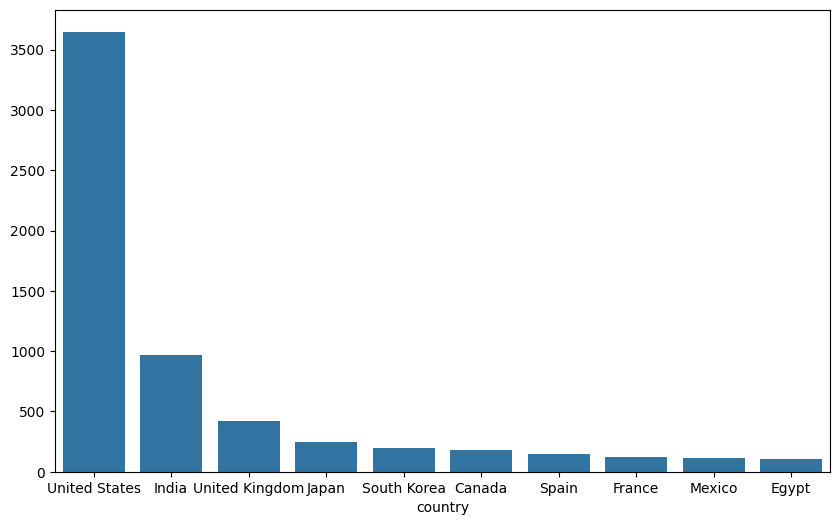

In [20]:
# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)

In [ ]:
# What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?
